In [7]:
pip install xgboost pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load the dataset
df = pd.read_csv("C:/Users/anshg/Downloads/Boost2_output.csv")
df.columns = ['time', 'inductor_current', 'capacitor_voltage', 'L', 'C']

# Feature Engineering
df['i'] = df['inductor_current']
df['v'] = df['capacitor_voltage']
df['i_v'] = df['i'] * df['v']
df['i_squared'] = df['i']**2
df['v_squared'] = df['v']**2
df['i_over_v'] = df['i'] / (df['v'] + 1e-6)  # Avoid division by zero
df['v_over_i'] = df['v'] / (df['i'] + 1e-6)

# Approximate time derivatives (assuming uniform time steps)
df['di_dt'] = df['i'].diff().fillna(0)
df['dv_dt'] = df['v'].diff().fillna(0)


In [11]:


# Define features and targets
features = ['i', 'v', 'i_v', 'i_squared', 'v_squared', 'i_over_v', 'v_over_i', 'di_dt', 'dv_dt']
X = df[features]
y_L = df['L']
y_C = df['C']

# Split the data
X_train, X_test, yL_train, yL_test = train_test_split(X, y_L, test_size=0.2, random_state=42)
_, _, yC_train, yC_test = train_test_split(X, y_C, test_size=0.2, random_state=42)

# Define XGBoost models
model_L = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_C = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train
model_L.fit(X_train, yL_train)
model_C.fit(X_train, yC_train)

# Predict
yL_pred = model_L.predict(X_test)
yC_pred = model_C.predict(X_test)

# Evaluate
print("📊 Performance on L prediction:")
print("R² Score:", r2_score(yL_test, yL_pred))
print("MSE:", mean_squared_error(yL_test, yL_pred))

print("\n📊 Performance on C prediction:")
print("R² Score:", r2_score(yC_test, yC_pred))
print("MSE:", mean_squared_error(yC_test, yC_pred))


📊 Performance on L prediction:
R² Score: 0.9983825055421137
MSE: 1.1108079035327686e-08

📊 Performance on C prediction:
R² Score: 0.9831790845019931
MSE: 3.994521419833136e-11


In [13]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 623.8 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/8.1 MB 623.8 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.1 MB 539.8 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 539.8 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 539.8 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 539.8 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/8.1 MB 453.2 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 453.2 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 453.2 kB/s eta 0:00:16
   ----- -------------


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


mkdir -p failed for path C:\Users\anshg\.matplotlib: [WinError 5] Access is denied: 'C:\\Users\\anshg\\.matplotlib'
Matplotlib created a temporary cache directory at C:\Users\anshg\AppData\Local\Temp\matplotlib-3asemf1k because there was an issue with the default path (C:\Users\anshg\.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


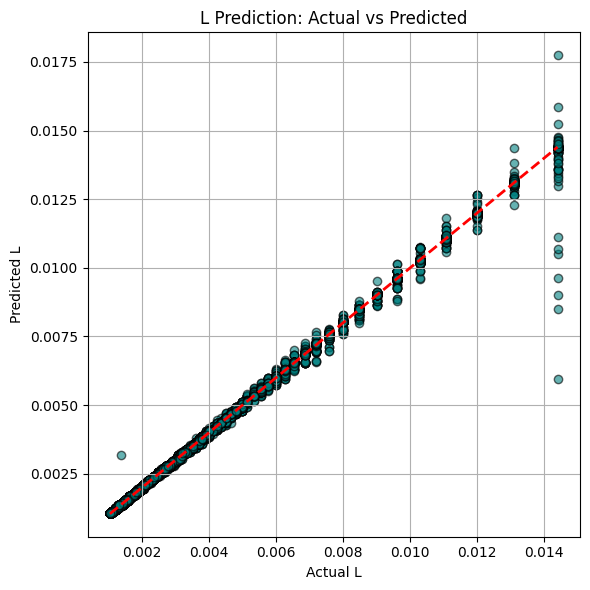

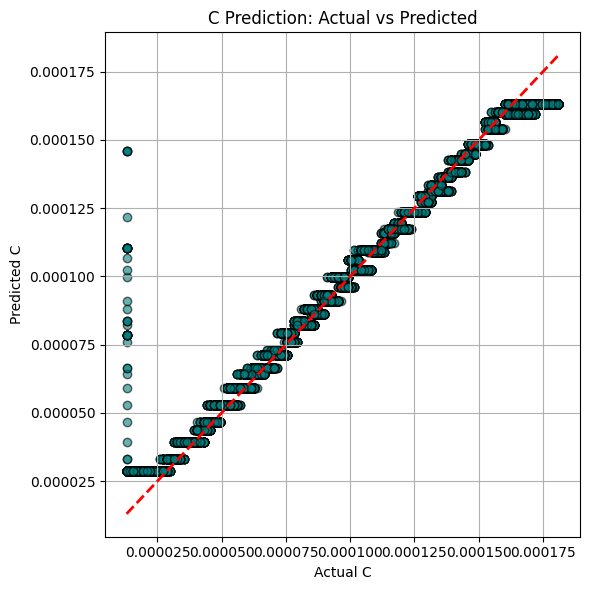

In [14]:
import matplotlib.pyplot as plt

# Plotting function
def plot_predictions(y_true, y_pred, label):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color='teal', edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel(f"Actual {label}")
    plt.ylabel(f"Predicted {label}")
    plt.title(f"{label} Prediction: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot L
plot_predictions(yL_test, yL_pred, 'L')

# Plot C
plot_predictions(yC_test, yC_pred, 'C')


In [18]:
yL_pred

array([0.00196669, 0.0059725 , 0.01306782, ..., 0.00144394, 0.00324513,
       0.00134129], shape=(26001,), dtype=float32)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Boost2_output.csv')

# Display the first few rows to confirm structure
print(df.head())

# Plot Time vs predicted C and L
plt.figure(figsize=(12, 6))
plt.plot(X_test['time'], yC_pred, label='Predicted C', color='blue')
plt.plot(X_test['time'],yL_pred, label='Predicted L', color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time vs Predicted C and L')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


       time  inductor_current  capacitor_voltage       L         C
0  0.000000          7.750000          48.150824  0.0144  0.000013
1  0.000025          6.004944          49.493349  0.0144  0.000013
2  0.000050          4.220898          50.385958  0.0144  0.000013
3  0.000075          5.601072          50.454867  0.0144  0.000013
4  0.000100          3.766515          51.342165  0.0144  0.000013


KeyError: 'time'

<Figure size 1200x600 with 0 Axes>

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"📊 Accuracy Metrics for {label}:")
    print(f"  🔸 MAE (Mean Absolute Error): {mae:.6f}")
    print(f"  🔸 MSE (Mean Squared Error): {mse:.6f}")
    print(f"  🔸 RMSE (Root Mean Squared Error): {rmse:.6f}")
    print(f"  🔸 R² Score: {r2:.6f}")
    print("-" * 50)

# Calculate for both models
regression_metrics(yL_test, yL_pred, "L")
regression_metrics(yC_test, yC_pred, "C")


📊 Accuracy Metrics for L:
  🔸 MAE (Mean Absolute Error): 0.000030
  🔸 MSE (Mean Squared Error): 0.000000
  🔸 RMSE (Root Mean Squared Error): 0.000105
  🔸 R² Score: 0.998383
--------------------------------------------------
📊 Accuracy Metrics for C:
  🔸 MAE (Mean Absolute Error): 0.000004
  🔸 MSE (Mean Squared Error): 0.000000
  🔸 RMSE (Root Mean Squared Error): 0.000006
  🔸 R² Score: 0.983179
--------------------------------------------------


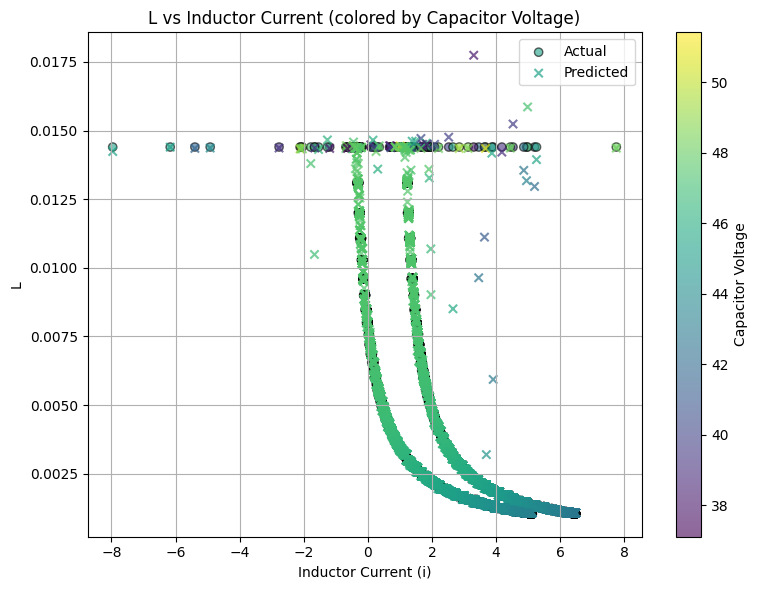

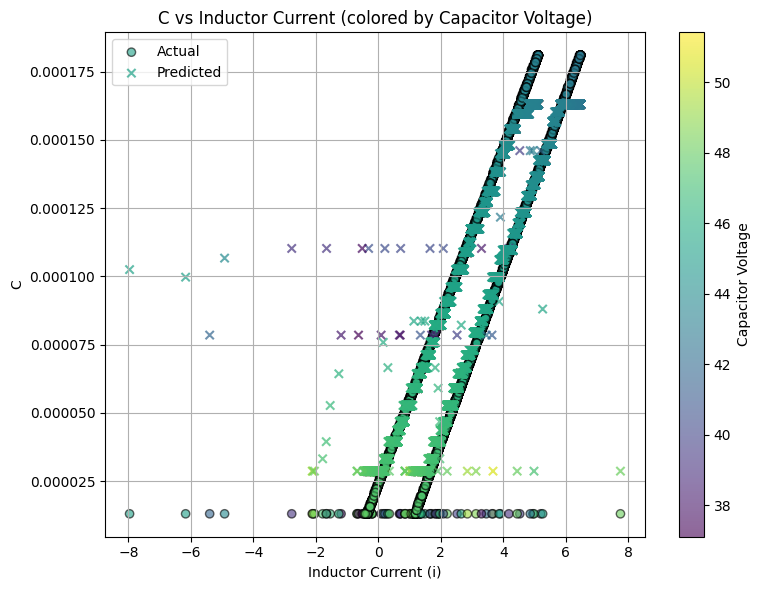

In [9]:
import matplotlib.pyplot as plt

def plot_colored_scatter(x, y_true, y_pred, color_by, color_label, title_label):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x, y_true, c=color_by, cmap='viridis', label='Actual', alpha=0.6, edgecolors='k')
    plt.scatter(x, y_pred, c=color_by, cmap='viridis', label='Predicted', marker='x', alpha=0.7)
    plt.colorbar(scatter, label=color_label)
    plt.xlabel("Inductor Current (i)")
    plt.ylabel(f"{title_label}")
    plt.title(f"{title_label} vs Inductor Current (colored by {color_label})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assumes df['i'], df['v'], yL_test, yL_pred, yC_test, yC_pred already defined
# Match indices for test split
i_test = X_test['i']
v_test = X_test['v']

# L vs inductor current
plot_colored_scatter(time, yL_test, yL_pred, v_test, 'Capacitor Voltage', 'L')

# C vs inductor current
plot_colored_scatter(i_test, yC_test, yC_pred, v_test, 'Capacitor Voltage', 'C')
